# Sprint 2 – Análise Exploratória Inicial (Zents Marketplace)
 A ideia aqui é entender melhor como os dados estão organizados, ver se tem valores faltando e já começar a preparar algumas colunas que vão ser úteis nas próximas etapas.

In [ ]:
# bibliotecas que eu vou usar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid')

In [4]:
pedidos = pd.read_csv('../data/raw/olist_orders_dataset.csv', parse_dates=['order_purchase_timestamp', 'order_delivered_customer_date'])
clientes = pd.read_csv('../data/raw/olist_customers_dataset.csv')
vendedores = pd.read_csv('../data/raw/olist_sellers_dataset.csv')
produtos = pd.read_csv('../data/raw/olist_products_dataset.csv')


## 1. Olhando o início dos dados
Vou começar vendo as primeiras linhas da tabela de pedidos.

In [5]:
pedidos.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Agora quero entender o tipo de informação que tem em cada coluna e se há valores faltando.

In [6]:
pedidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](2), object(6)
memory usage: 6.1+ MB


## 2. Criando a coluna de tempo de entrega
Vou criar uma coluna chamada `tempo_entrega`, que é a diferença entre a data da compra e a data de entrega.

In [7]:
pedidos['tempo_entrega'] = (pedidos['order_delivered_customer_date'] - pedidos['order_purchase_timestamp']).dt.days

Algumas entregas ainda não foram feitas, por isso o valor fica nulo.
 Vou remover esses casos só para o gráfico ficar mais bonito.:)

In [8]:
tempo_entrega_limpo = pedidos['tempo_entrega'].dropna()

## 3. Visualizando o tempo de entrega
Agora vou ver como os tempos de entrega estão distribuídos.

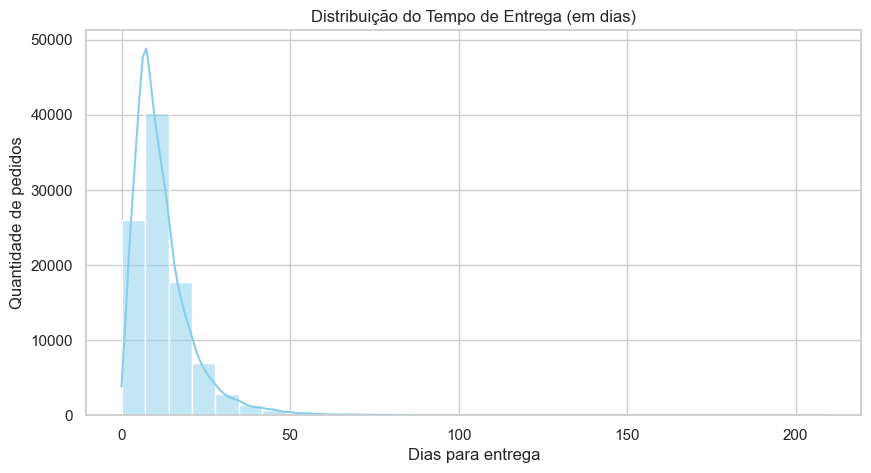

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(tempo_entrega_limpo, bins=30, kde=True, color='skyblue')
plt.title('Distribuição do Tempo de Entrega (em dias)')
plt.xlabel('Dias para entrega')
plt.ylabel('Quantidade de pedidos')
plt.show()

## 4. Valores ausentes
Quero ver agora quais colunas têm valores faltando e quanto isso representa.

In [10]:
nulos = pedidos.isnull().mean() * 100
nulos[nulos > 0].sort_values(ascending=False)

tempo_entrega                    2.981668
order_delivered_customer_date    2.981668
order_delivered_carrier_date     1.793023
order_approved_at                0.160899
dtype: float64

## 5. Conclusão até aqui
Consegui entender um pouco melhor os dados da Zents. Vi que o tempo de entrega varia bastante e que há algumas entregas que ainda não foram feitas. Na próxima sprint, vou focar nos valores extremos e ver se tem algum outlier que pode afetar a análise.